
# **Assignment 1**


## Task 1. Correlation
We will use the data example from the textbook "Statistical Analysis with The General Linear Model" by Miller and Haden (2013), Chapter 11.

As in Miller and Haden, we have five columns:

-Participant (Participant),

-Reading Ability (Abil),

-Intelligence (IQ),

-Number of minutes spent reading at home per week (Home),

-Number of minutes spent watching TV per week (TV).


For the task we will focus on the relationship between Reading Ability and IQ, but for further practice you can look at other relationships on your own.

**Question 1**:

a. Check whether the data is interval, ratio, or ordinal.

b. Check whether there is a data point for each participant on both variables.

c. Check whether the data is normally distributed in both variables.

d. Create a scatter plot with Reading Ability being the x-axis and IQ, being the y-axis.

e. Draw a correlation line on the scatter plot.


**Instructions:**

1. Load the necessary libraries and explain why you need them ("#used for ...").

2. Read the MillerHadenData.csv file into a DataFrame and name it "df_mh".

In [185]:
import pandas as pd # used for data wrangling
import seaborn as sns # used for visualization
import matplotlib  # used for plotting
from matplotlib import pyplot as plt # used for providing a MATLAB-like plotting framework
import pylab # used for math and array manipulation and data visualization
import pingouin as pg # used for statistical analysis

#Read data with pandas
df_mh = pd.read_csv(r'C:\Users\ASUS\Desktop\A1_analysing_data\data for A1\MillerHadenData.csv')

In [186]:
# Q1a (code):
# Display first few rows of the dataframe
df_mh.head()

,Participant,Abil,IQ,Home,TV
0,1,61,107,144,487
1,2,56,109,123,608
2,3,45,81,108,640
3,4,66,100,155,493
4,5,49,92,103,636


In [187]:
# Check data types and information
df_mh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Participant  25 non-null     int64
 1   Abil         25 non-null     int64
 2   IQ           25 non-null     int64
 3   Home         25 non-null     int64
 4   TV           25 non-null     int64
dtypes: int64(5)
memory usage: 1.1 KB


In [188]:
# Q1b (code):
# Check for missing values
missing_values = df_mh.isnull().sum() ## Source: https://www.geeksforgeeks.org/working-with-missing-data-in-pandas/
print(missing_values)

Participant    0
Abil           0
IQ             0
Home           0
TV             0
dtype: int64


In [189]:
# Check whether there is a data point for each participant on both variables
## Remove rows from Dataframe that have at least one missing value in the 'Abil' and 'IQ' columns
participants_data = df_mh.dropna(subset=['Abil', 'IQ'])
print(participants_data)

    Participant  Abil   IQ  Home   TV
0             1    61  107   144  487
1             2    56  109   123  608
2             3    45   81   108  640
3             4    66  100   155  493
4             5    49   92   103  636
5             6    62  105   161  407
6             7    61   92   138  463
7             8    55  101   119  717
8             9    62  118   155  643
9            10    61   99   121  674
10           11    51  104    93  675
11           12    48  100   127  595
12           13    50   95    97  673
13           14    50   82   140  523
14           15    67  114   151  665
15           16    51   95   112  663
16           17    55   94   102  684
17           18    54  103   142  505
18           19    57   96   127  541
19           20    54  104   102  678
20           21    52   98   124  564
21           22    48  117    87  787
22           23    61  100   141  582
23           24    54  101   117  647
24           25    48   94   111  448


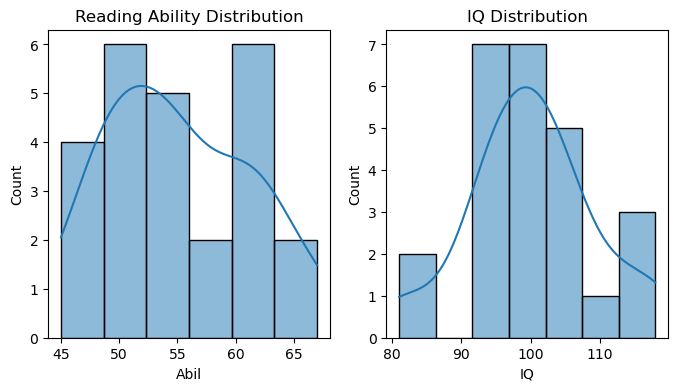

In [190]:
# Q1c (code):
# Check data distribution Source: https://www.youtube.com/watch?v=IW1BMGtz6UY
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
sns.histplot(df_mh['Abil'], kde=True)
plt.title('Reading Ability Distribution')

plt.subplot(1, 2, 2)
sns.histplot(df_mh['IQ'], kde=True)
plt.title('IQ Distribution')
plt.show()

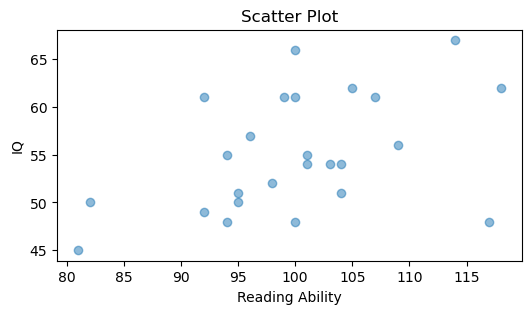

In [191]:
# Q1d (code):
# Create scatter plot with matplotlib
plt.figure(figsize=(6, 3))
plt.scatter(df_mh['IQ'], df_mh['Abil'], alpha=0.5)

plt.title('Scatter Plot')
plt.xlabel('Reading Ability')
plt.ylabel('IQ')

plt.show()

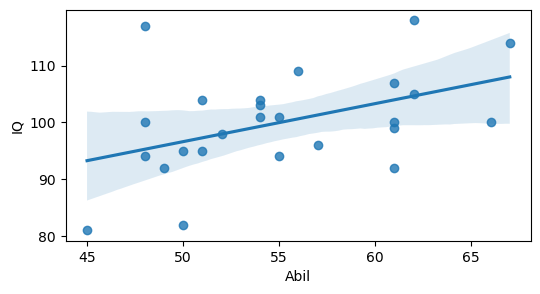

In [192]:
# Q1e (code):
# Correlation line Source: https://www.geeksforgeeks.org/python-seaborn-regplot-method/
plt.figure(figsize=(6, 3))
sns.regplot(x='Abil', y='IQ', data=df_mh, scatter=True)
plt.show()

**Question 2**:

a. Which correlation coefficient test can we use, Pearson or Spearman? Briefly explian why based on the results of Question 1.

b. Conduct a correlation coefficient test.

c. Interpret the result (direction and strength of the association between the two varibles)

# Q2a (answer with words):
We can use Spearman correlation coefficient. The relationship between the two variables is linear, that is, the change of one variable is proportional to the change of the other variable. However, there are some outliers in the scatter plot. 

In [193]:
# Q2b (code):
# Calculate the Pearson correlation coefficients for x and y and their p-values using the scipy.stats library
pearson_corr, p_value = stats.pearsonr(x, y)
print(pearson_corr, p_value)

0.45116993876507605 0.02359260883361456


# Q2c (answer with words):
The coefficient of 0.451 indicates that there is a moderately positive correlation between reading ability and IQ. The higher the reading ability, the higher the IQ scores tend to be. The p-value of about 0.024 represents that this correlation is statistically significant and unlikely to be a result arrived at by chance.

## Task 2. Chi-square Test
We will continue to use the data example from Task 1.

We want to explore whether there are significant differences in the amount of time spent reading at home per week (Home) among people with different reading abilities (Reading Ability). Therefore, we will divide the reading ability of all participants into two groups. The first group is those with low reading ability (Reading Ability at or below the rounded average), and the second group is those with high reading ability (Reading Ability above the rounded average). We will store this grouping in a new column named "Rank_Abil".


Similarly, the reading time is divided into two different scenarios: the first scenario is infrequent reading (Home at or below the rounded average), and the other is frequent reading (Reading Ability above the rounded average). We will store this grouping in a new column named "Rank_Home".


Then, construct a Contingency Matrix and perform a Chi-square test.

**Question 3**:

a. Please state the null hypothesis (H0) and alternative hypothesis (H1) for this Chi-square test.

b. Based on the task description, add new columns “Rank_Abil” and "Rank_Home" to the dataframe df_mh.

c. Construct a Contingency Matrix.

d. Perform a Chi-square test.

e. Interpret the results of the Chi-square test (answer in text).

# Q3a (answer in words):
# H0:
There is no association between reading ability and the frequency of reading at home. The level of reading ability does not affect whether a person reads at home frequently or infrequently.
# H1：
There is an association between reading ability and the frequency of reading at home. The level of reading ability does affect whether an individual reads at home frequently or infrequently.

In [194]:
# Q3b (code):
# Import necessary libraries
import pandas as pd  ##used for data wrangling
from scipy.stats import chi2_contingency ##used for the chi-square test

In [195]:
# Define the rounded average for Reading Ability and Home 
## Source: https://www.geeksforgeeks.org/round-function-python/
avg_reading_ability = round(df_mh['Abil'].mean())
avg_home_reading_time = round(df_mh['Home'].mean())

print(avg_reading_ability)
print(avg_home_reading_time)

55
124


In [196]:
# Categorize reading ability into high and low
## Source: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html
df_mh['Rank_Abil'] = df_mh['Abil'].apply(lambda x: 'High' if x > avg_reading_ability else 'Low')

# Categorize home reading time into frequent and infrequent without numpy
df_mh['Rank_Home'] = df_mh['Home'].apply(lambda x: 'Frequent' if x > avg_home_reading_time else 'Infrequent')

print(df_mh.head())

   Participant  Abil   IQ  Home   TV Rank_Abil   Rank_Home
0            1    61  107   144  487      High    Frequent
1            2    56  109   123  608      High  Infrequent
2            3    45   81   108  640       Low  Infrequent
3            4    66  100   155  493      High    Frequent
4            5    49   92   103  636       Low  Infrequent


In [197]:
# Q3c (code):
# Construct Contingency Matrix
contingency_matrix = pd.crosstab(df_mh['Rank_Abil'], df_mh['Rank_Home'])

In [198]:
# Q3d (code):
# Perform the Chi-square test
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_matrix)
print("Chi-square Statistic:", chi2_stat)
print("P-value:", p_val)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:", expected)

Chi-square Statistic: 6.500270562770561
P-value: 0.010785807794066234
Degrees of Freedom: 1
Expected Frequencies: [[4.4 5.6]
 [6.6 8.4]]


# Q3e (answer in words):
The p-value of 0.010785807794066234 is less than 0.05, the level of significance. It means that there is a significant correlation between reading ability and frequency of reading at home. The two aspects re not independent and there is statistical evidence that reading ability affects the frequency of reading at home.

## Task 3. Two-sample t-test
As we discussed on Week 3, Two-sample designs are very useful when we want to know whether there is a difference between groups on a particular variable.

In this assignment, you will be guided to replicate the Experiment 4 (p. 887-888) from the paper below, focusing on understanding the data through descriptive statistics, visualizing distributions, testing assumptions (normality and variance homogeneity), and finally performing the independent t-test.

Schroeder, J. and Epley, N. (2015). The sound of intellect: Speech reveals a thoughtful mind, increasing a job candidate's appeal. Psychological Science, 26, 277--891.


As we explained during Week 3 lecture, there are different types of two-sample designs depending on whether or not the two groups are independent (e.g., different participants in different conditions) or not (e.g., same participants in different conditions). In this course we focus on independent samples, which typically means that the observations in the two groups are unrelated - usually meaning different people. But in real practice you will need to go through similar procedures to determine which is the proper statistical test to use.




### Background of data: Speech as indicator of intellect
To recap on Experiment 4, 39 professional recruiters from Fortune 500 companies evaluated job pitches of M.B.A. candidates (Masters in Business Administration) from the University of Chicago Booth School of Business. The methods and results appear on pages 887--889 of the article if you want to look at them specifically for more details.

###Step 1: Analyze the demographics of evaluators from the provided dataset

**Instructions:**

1. Load the necessary libraries (pandas, scipy, numpy, matplotlib.pyplot, seaborn) and explain why you need them ("#used for ...").

2. Read the evaluators.csv file into a DataFrame.

3. Calculate the mean and standard deviation of the age of the evaluators, handling missing values appropriately.

4. Count how many male and female evaluators were in the study.

**Question 4:**

a. What was the mean age of the evaluators?
What was the standard deviation of the age of the evaluators?

b. How many participants were female and how many participants were male?


In [199]:
import pandas as pd # used for data wrangling
from scipy import stats # used for statistical analysis
import numpy as np # used for numerical calculation
import matplotlib.pyplot as plt # used for data visualization
import seaborn as sns # used for visualization

# Load the data
df_evaluators = pd.read_csv(r'C:\Users\ASUS\Desktop\A1_analysing_data\data for A1\evaluators.csv')
df_evaluators.head()

,eval_id,condition,age,sex
0,1,listened,29.0,2.0
1,2,listened,27.0,2.0
2,3,listened,27.0,2.0
3,4,read,40.0,2.0
4,5,read,32.0,2.0


In [200]:
# Q4a (code):
# Calculate mean and standard deviation for age
mean_age = df_evaluators['age'].mean()
print(mean_age)

std_age = df_evaluators['age'].std()
print(std_age)

30.852941176470587
6.238358141327351


In [201]:
# Q4b (code)
# Count male and female evaluators
# In the 'sex' column: 1 represents males and 2 represents females
## Use the value_counts() function to count the number of sexes
sex_counts = df_evaluators['sex'].value_counts()
sex_counts.index = ['Male' if x == 1 else 'Female' for x in sex_counts.index]
print(sex_counts)

Female    30
Male       4
Name: sex, dtype: int64


###Step 2: Calculate overall intellect ratings from evaluators and prepare a combined dataset for analysis

We are now going to calculate an overall intellect rating given by each evaluator. To break that down a bit, we are going to calculate how intellectual the evaluators (the raters) thought candidates were overall, depending on whether the evaluators read or listened to the candidates' resume pitches. This is calculated by averaging the ratings of competent, thoughtful and intelligent for each evaluator held within ratings.csv.

Note: We are not looking at ratings to individual candidates; we are looking at overall ratings for each evaluator. This is a bit confusing but makes sense if you stop to think about it a little. You can think about it in terms of "do raters rate differently depending on whether they read or listen to a resume pitch".
We will then combine the overall intellect rating with the overall impression ratings and overall hire ratings for each evaluator, all ready found in ratings.csv. In the end we will have a new new dataframe named "ratings2" - which has the below structure:

**eval_id** shows the evaluator ID. Each evaluator has a different ID. So all the 1's are the same evaluator.

**Category** shows the scale that they were rating on - intellect, hire, impression

**Rating** shows the overall rating given by that evaluator on a given scale.

**condition** shows whether that evaluator listened to (e.g., evaluators 1, 2 and 3), or read (e.g., evaluator 4) the resume.


**Instructions:**

1. Load the ratings.csv file.

2. Filter and calculate the mean intellect rating for each evaluator.

3. Combine this with overall impression and hire ratings to create a new DataFrame named "rating2".

4. Merge this DataFrame with the evaluator demographics.

**Question 5**:

Print the head of "rating2".


In [202]:
# Load ratings data
df_ratings = pd.read_csv(r'C:\Users\ASUS\Desktop\A1_analysing_data\data for A1\ratings.csv')
df_ratings.head()

,eval_id,Category,Rating
0,1,competent,6.0
1,1,thoughtful,6.0
2,1,intelligent,6.0
3,1,impression,7.0
4,1,hire,6.0


In [203]:
# Q5 (code):
# Filter the ratings DataFrame to include only 'thoughtful', 'competent', and 'intelligent' categories
intellect_categories = ['thoughtful', 'competent', 'intelligent']
df_intellect = df_ratings[df_ratings['Category'].isin(intellect_categories)]
print(df_intellect.head())

   eval_id     Category  Rating
0        1    competent     6.0
1        1   thoughtful     6.0
2        1  intelligent     6.0
5        2    competent     5.0
6        2   thoughtful     7.0


In [204]:
# Calculate the mean intellect rating for each evaluator
overall_mean_rating = df_intellect['Rating'].mean()

# Rename the columns
mean_intellect_ratings.rename(columns={'Rating': 'Mean_Intellect_Rating'}, inplace=True)
print(mean_intellect_ratings.head())

   eval_id  Mean_Intellect_Rating   Category
0        1               6.000000  intellect
1        2               5.666667  intellect
2        3               6.000000  intellect
3        4               3.333333  intellect
4        5               1.000000  intellect


In [205]:
# Group by 'eval_id' and calculate mean, then reset the index to convert groupby object back to DataFrame
mean_intellect_ratings = df_intellect.groupby('eval_id')['Rating'].mean().reset_index()
print(mean_ratings.head())

   eval_id    Rating
0        1  6.200000
1        2  5.133333
2        3  6.266667
3        4  3.733333
4        5  1.066667


In [206]:
# Add a 'Category' column with the value 'intellect' for these rows
mean_intellect_ratings['Category'] = 'intellect'
print(mean_intellect_ratings.head())

   eval_id    Rating   Category
0        1  6.000000  intellect
1        2  5.666667  intellect
2        3  6.000000  intellect
3        4  3.333333  intellect
4        5  1.000000  intellect


In [207]:
# Create a DataFrame for 'impression' and 'hire' ratings
impression_hire_ratings = df_ratings[df_ratings['Category'].isin(['impression', 'hire'])]

In [208]:
# Combine the DataFrames to create 'ratings2'
combined_ratings = pd.concat([mean_intellect_ratings, impression_hire_ratings], ignore_index=True)
print(combined_ratings.head())

   eval_id    Rating   Category
0        1  6.000000  intellect
1        2  5.666667  intellect
2        3  6.000000  intellect
3        4  3.333333  intellect
4        5  1.000000  intellect


In [209]:
# Join 'ratings2' with the 'df_evaluators' DataFrame to add the 'condition' column
combined_df = pd.merge(ratings2, df_evaluators, on='eval_id', how='left')
print(combined_df.head())

   eval_id    Rating   Category condition   age  sex
0        1  6.000000  intellect  listened  29.0  2.0
1        2  5.666667  intellect  listened  27.0  2.0
2        3  6.000000  intellect  listened  27.0  2.0
3        4  3.333333  intellect      read  40.0  2.0
4        5  1.000000  intellect      read  32.0  2.0


In [210]:
# Select only the necessary columns as per the structure required
final_df = combined_df[['eval_id', 'Category', 'Rating', 'condition']]

print(final_df.head())

   eval_id   Category    Rating condition
0        1  intellect  6.000000  listened
1        2  intellect  5.666667  listened
2        3  intellect  6.000000  listened
3        4  intellect  3.333333      read
4        5  intellect  1.000000      read


In [211]:
# Assuming df_evaluators contains 'eval_id' and 'condition' columns
# Ensure the merge operation is correctly specified
ratings2_with_condition = ratings2.merge(df_evaluators[['eval_id', 'condition']], on='eval_id', how='left')

In [212]:
# Arrange by 'eval_id' and 'Category'
ratings2_df = final_df.sort_values(by=['eval_id', 'Category'])

# Display the first few rows of the final 'ratings2' DataFrame to verify
print(ratings2_df.head())

    eval_id    Category    Rating condition
40        1        hire  6.000000  listened
39        1  impression  7.000000  listened
0         1   intellect  6.000000  listened
42        2        hire  4.000000  listened
41        2  impression  4.666667  listened


###Step 3: Perform descriptive and inferential statistical analyses, including testing assumptions and conducting independent t-tests.

We are going to run the t-tests for Intellect, Hire and Impression; each time comparing evaluators overall ratings for the listened group versus overall ratings for the read group to see if there was a significant difference between the two conditions: i.e., did the evaluators who listened to pitches give a significant higher or lower rating than evaluators that read pitches?

**Question 6**:

a. In terms of hypotheses, how can we phrase the hypothesis?

b. Which t-test should we choose, one-tail or two-tail? And explian why.

c. What are the independent variable and the dependent variable here?



# Q6a (answer in words):
# Null hypothesis:
There is no significant difference in overall ratings between those who listened to the speech and those who read it. This means that the way of presentation does not affect the evaluators' ratings.
# Alternative hypothesis:
There is significant difference in overall ratings between the evaluators who listened to the speech and those who read it. This means that the way of presentation does affect the evaluators' ratings.

we could phrase the null hypothesis for these tests as there is no significant difference between overall ratings on the {insert trait} scale between evaluators who listened to resume pitches and evaluators who read the resume pitches (H0:μ1=μ2). Alternatively, we could state it as there will be a significant difference between overall ratings on the {insert trait} scale between evaluators who listened to resume pitches and evaluators who read the resume pitches (H1:μ1≠μ2).

# Q6b (answer in words):
# Which t-test should we choose, one-tail or two-tail? Explian why.

Two-tailed t-test is used because the research hypothesis does not specify directionality.That is, it aims to detect any significant differences in evaluators' ratings between the listening and reading without presupposing the specific direction of such differences. Two-tailed t-test allows for detecting significant differences in any direction and is more appropriate for exploratory analytical purposes.

# Q6c (answer in words):
# What are the independent variable and the dependent variable here?
Independent Variable: the condition under which the evaluators receive the pitches: listening and reading.

Dependent Variable: the overall ratings given by the evaluators, including ratings for intellect, hire, and impression.


To clarify, we are going to run three between-subjects t-tests in total; one for intellect ratings; one for hire ratings; one for impression ratings.

**Instructions:**

1. Descriptive analysis of the ratings.

2. Test for normal distribution (Shapiro-Wilk test) and homogeneity of variances (Levene's test) for the intellect, impression, and hire ratings.

3. Conduct independent t-tests comparing intellect, impression, and hire ratings between conditions (listened vs. read).

Hints: three T-tests need to be performed.

**Question 7**:

a: Print the test results.

b: Interpret the results of the above descriptive statistics, Shapiro-Wilk test, Levene's test, and independent t-tests. Explian why we use these tests and how we made our decisions based on the test result.

In [213]:
##Q7a (code):
from scipy.stats import shapiro, levene, ttest_ind # used for data analysis

In [214]:
print(df_ratings.columns)

Index(['eval_id', 'Category', 'Rating'], dtype='object')


In [215]:
ratings_desc = ratings2_df.groupby('Category')['Rating'].describe()
print(ratings_desc)

            count      mean       std       min       25%       50%  75%  \
Category                                                                   
hire         39.0  3.871795  2.330343  0.000000  2.000000  4.000000  5.0   
impression   39.0  5.094017  2.254234  0.333333  3.666667  5.333333  7.0   
intellect    39.0  4.717949  2.000787  0.666667  3.500000  5.000000  6.0   

                 max  
Category              
hire        8.000000  
impression  8.666667  
intellect   9.000000  


In [216]:
# Test for normal distribution (Shapiro-Wilk test)

shapiro_results = {}

for category in ratings2_df['Category'].unique():
    category_ratings = ratings2_df[ratings2_df['Category'] == category]['Rating']
    if len(category_ratings) >= 3:
        score_shapiro, p_val_shapiro = shapiro(category_ratings)
        shapiro_results[category] = p_val_shapiro
    else:
        shapiro_results[category] = 'Not enough data points'

print(shapiro_results)

{'hire': 0.04710369557142258, 'impression': 0.17238670587539673, 'intellect': 0.5182666182518005}


In [217]:
# Test for homogeneity of variances (Levene's test)

levene_results = {}

for category in ratings2_df['Category'].unique():
    listened_ratings = ratings2_df[(ratings2_df['Category'] == category) & (ratings2_df['condition'] == 'listened')]['Rating']
    read_ratings = ratings2_df[(ratings2_df['Category'] == category) & (ratings2_df['condition'] == 'read')]['Rating']
    
    score_levene, p_val_levene = levene(listened_ratings, read_ratings)
    levene_results[category] = p_val_levene

print(levene_results)

{'hire': 0.7458453933447955, 'impression': 0.5358960150374064, 'intellect': 0.34946205893248505}


In [218]:
# Independent t-tests
ttest_results = {}

for category in ratings2_df['Category'].unique():
    listened_ratings = ratings2_df[(ratings2_df['Category'] == category) & (ratings2_df['condition'] == 'listened')]['Rating']
    read_ratings = ratings2_df[(ratings2_df['Category'] == category) & (ratings2_df['condition'] == 'read')]['Rating']
    
    t_stat, p_val = ttest_ind(listened_ratings, read_ratings, equal_var=True)  # 假设方差相等
    ttest_results[category] = {'t_stat': t_stat, 'p_val': p_val}

for category, results in ttest_results.items():
    print(f"Category: {category}\n  t-statistic: {results['t_stat']}, p-value: {results['p_val']}\n")

Category: hire
  t-statistic: 2.620100218173143, p-value: 0.012674511839824125

Category: impression
  t-statistic: 2.850766179025179, p-value: 0.007091060616710596

Category: intellect
  t-statistic: 3.5259329220482414, p-value: 0.0011444414996286821



Shapiro-Wilk Test:
--------------------------------
- hire: 
  - P-value (0.0471) is sighltly less than 0.05, suggesting a statistically significant deviation from normal distribution for hire ratings.
- impression: 
  - P-value (0.1724) is greater than 0.05, indicating the distribution of impression ratings does not significantly deviate from normality.
- intellect: 
  - P-value (0.5183) is ignificantly greater than 0.05, indicating no significant deviation from normal distribution for intellect ratings, meeting the assumption of normality.

Levene's Test:
----------------------------
- All p-values are greater than 0.05, indicating no significant difference in variances between the different conditions.

Independent t-test:
-------------------------------------------------
- hire: 
  - T-statistic is 2.6201 and p-value is 0.0127, indicating a statistically significant difference in hire ratings between the two conditions (listening vs. reading).
- impression: 
  - T-statistic is 2.8508 and p-value is 0.0071, indicating a significant difference in impression ratings between conditions.
- intellect: 
  - T-statistic is 3.5259 and p-value is 0.0011, indicating a very significant difference in intellect ratings between conditions.

Reason
----------------------------------------------------------------
- Shapiro-Wilk Test is used to assess if data meets the normality assumption. Non-normal data may necessitate non-parametric methods or data transformation.
- Levene's Test is used to check homogeneity of variances. Equal variances allow standard t-tests, and unequal variances require adjustments or alternative tests.
- Independent Samples t-test is used to compare mean differences between two independent groups. It effectively determines if differences are statistically significant.

Conclusion
------------
- Significant p-values in t-tests for hire and impression ratings indicate significant differences between conditions, despite hire ratings' marginal normality assumption failure.
- For intellect ratings, both normality and homogeneity of variances assumptions are met.